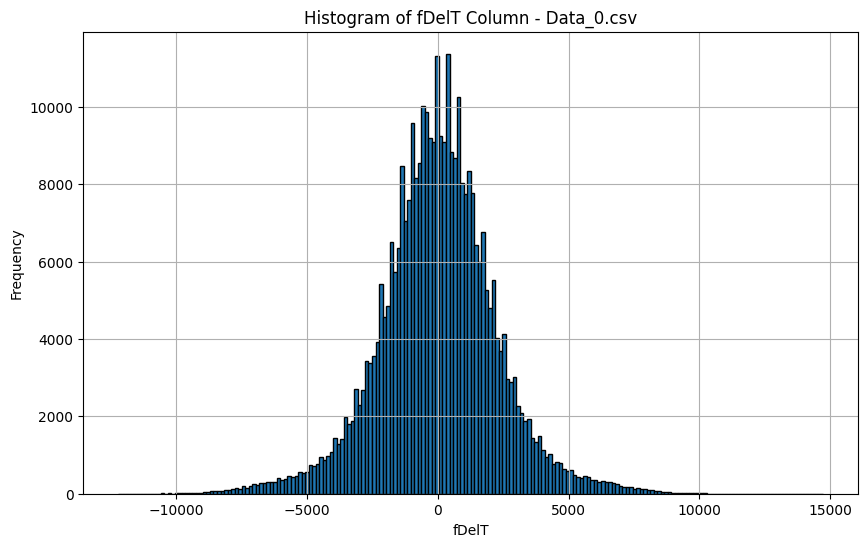

File: Data_0.csv
Average fDelT: -1.5077585681901263e-07
Mode fDelT: -54.23978978486996
Standard Deviation fDelT: 2253.972654942119
----------------------------------------


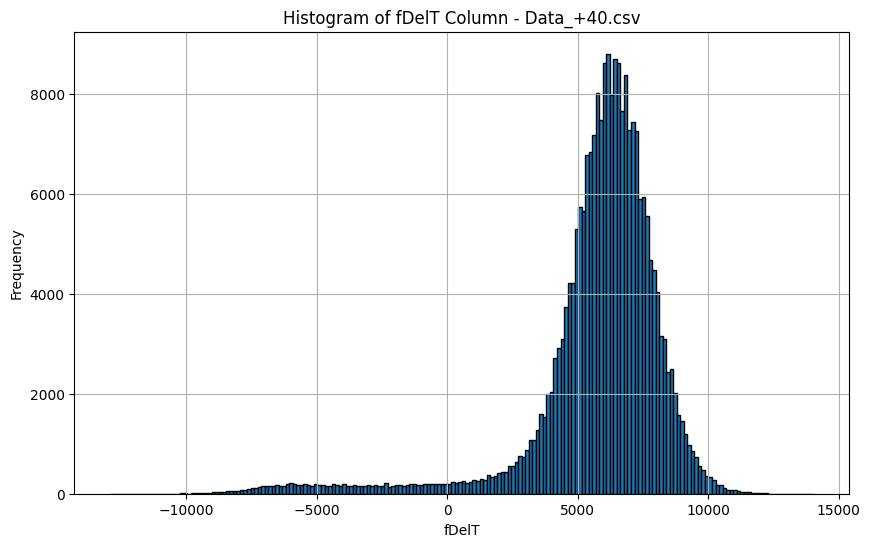

File: Data_+40.csv
Average fDelT: 5763.44773383509
Mode fDelT: 6742.76021021513
Standard Deviation fDelT: 2647.828776032433
----------------------------------------


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# List of specific CSV files
csv_files = [
    'Data_0.csv', 'Data_+10.csv', 'Data_+20.csv', 'Data_+30.csv', 'Data_+40.csv', 'Data_+45.csv',
    'Data_-10.csv', 'Data_-20.csv', 'Data_-30.csv', 'Data_-40.csv', 'Data_-45.csv'
]


# Function to calculate statistics and plot histogram for a single file
def analyze_file(file):
    data = pd.read_csv(file)
    
    average_fDelT = data['corrected'].mean()
    mode_fDelT = data['corrected'].mode()[0] if not data['corrected'].mode().empty else None
    std_dev_fDelT = data['corrected'].std()

    plt.figure(figsize=(10, 6))
    plt.hist(data['corrected'], bins=200, edgecolor='black')
    plt.title(f'Histogram of fDelT Column - {file}')
    plt.xlabel('fDelT')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    print(f'File: {file}')
    print(f'Average fDelT: {average_fDelT}')
    print(f'Mode fDelT: {mode_fDelT}')
    print(f'Standard Deviation fDelT: {std_dev_fDelT}')
    print('-' * 40)

# Analyze each file
for file in csv_files:
    analyze_file(file)


Regression Equation: dist = 0.00672 * avg_corrected + -0.05479
Mean Squared Error: 0.9490260650801727


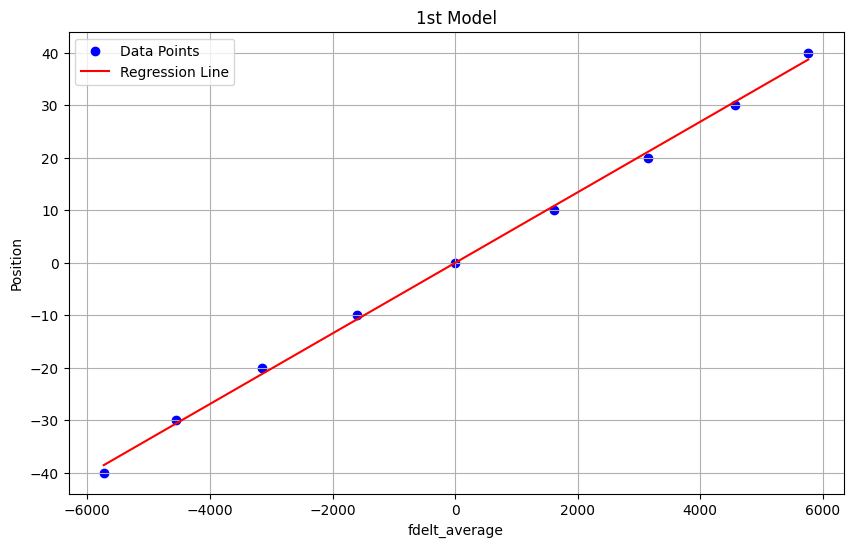

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# List of specific CSV files
csv_files = [
    'Data_0.csv', 'Data_+10.csv', 'Data_+20.csv', 'Data_+30.csv', 'Data_+40.csv',
    'Data_-10.csv', 'Data_-20.csv', 'Data_-30.csv', 'Data_-40.csv'
]

# Initialize arrays to store data for linear regression
independent_feature = []
dependent_feature = []

# Load data and populate arrays
for file in csv_files:
    try:
        dist = int(file.split('_')[1].split('.')[0].replace('+', ''))
        data = pd.read_csv(file)

        if 'corrected' not in data.columns:
            print(f"Column 'corrected' does not exist in {file}. Skipping this file.")
            continue
        
        avg_corrected = data['corrected'].mean()
        
        independent_feature.append(avg_corrected)
        dependent_feature.append(dist)
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Order the data for proper plotting
order = np.argsort(independent_feature)
independent_feature = np.array(independent_feature)[order].reshape(-1, 1)
dependent_feature = np.array(dependent_feature)[order]

# Linear regression modeling
model = LinearRegression()
model.fit(independent_feature, dependent_feature)

# Get the regression parameters
slope = model.coef_[0]
intercept = model.intercept_

# Print the equation of the regression line
equation = f'dist = {slope:.5f} * avg_corrected + {intercept:.5f}'
print('Regression Equation:', equation)

# Predict and calculate the Mean Squared Error
predicted_values = model.predict(independent_feature)
mse = mean_squared_error(dependent_feature, predicted_values)
print('Mean Squared Error:', mse)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(independent_feature, dependent_feature, color='blue', label='Data Points')
plt.plot(independent_feature, predicted_values, color='red', label='Regression Line')
plt.title('1st Model')
plt.xlabel('fdelt_average')
plt.ylabel('Position')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the trained linear regression model (replace with your trained model)
# model = load_model('path_to_your_trained_model')

# Test file names
test_files = ['Data_+45.csv', 'Data_-45.csv']

# Initialize arrays to store data for prediction
avg_fDelT_test = []

# Load data and populate arrays
for file in test_files:
    data = pd.read_csv(file)
    avg_fDelT = data['corrected'].mean()
    
    avg_fDelT_test.append(avg_fDelT)

# Reshape the data array
avg_fDelT_test = np.array(avg_fDelT_test).reshape(-1, 1)

# Predict dist using the trained model
predicted_dist = model.predict(avg_fDelT_test)

# Print the predicted dist values for each test file
for i, file in enumerate(test_files):
    print(f"Test File: {file}, Predicted dist: {predicted_dist[i]:.2f}")


Test File: Data_+45.csv, Predicted dist: 41.38
Test File: Data_-45.csv, Predicted dist: -41.18


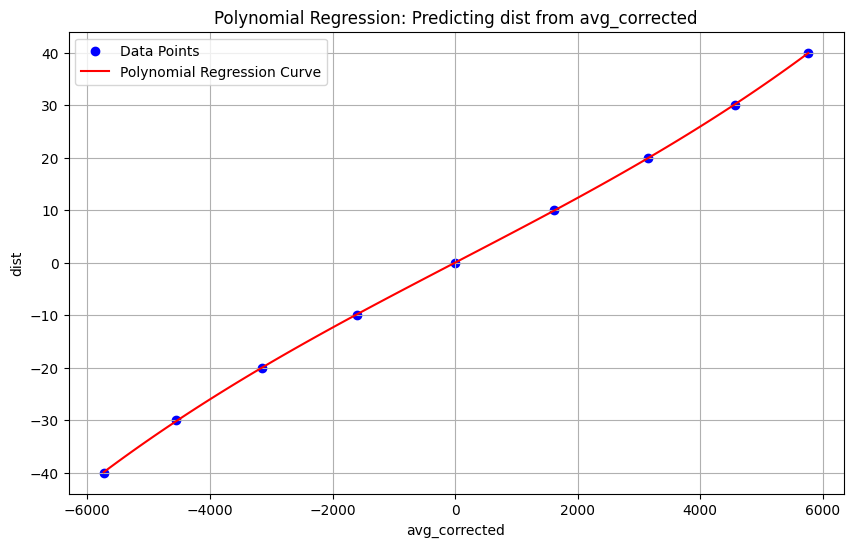

Polynomial Regression Equation: dist = -0.01 + 0.01 * avg_corrected^1 + -0.00 * avg_corrected^2 + 0.00 * avg_corrected^3


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# List of specific CSV files
csv_files = [
    'Data_0.csv', 'Data_+10.csv', 'Data_+20.csv', 'Data_+30.csv', 'Data_+40.csv',
    'Data_-10.csv', 'Data_-20.csv', 'Data_-30.csv', 'Data_-40.csv'
]

# Initialize arrays to store data for polynomial regression
independent_feature = []
dependent_feature = []

# Load data and populate arrays
for file in csv_files:
    dist = int(file.split('_')[1].split('.')[0].replace('+',''))  # Extract the 'dist' value from the file name
    data = pd.read_csv(file)
    
    if 'corrected' not in data.columns:
        print(f"Column 'corrected' does not exist in {file}. Skipping this file.")
        continue

    avg_corrected = data['corrected'].mean()
    
    independent_feature.append(avg_corrected)
    dependent_feature.append(dist)

# Reshape the data arrays
independent_feature = np.array(independent_feature).reshape(-1, 1)
dependent_feature = np.array(dependent_feature)

# Perform polynomial regression up to degree 3
degree = 3
poly_features = PolynomialFeatures(degree=degree)
independent_feature_poly = poly_features.fit_transform(independent_feature)

model = LinearRegression()
model.fit(independent_feature_poly, dependent_feature)

# Generate points for the polynomial regression curve
x_range = np.linspace(independent_feature.min(), independent_feature.max(), 100)
x_range_poly = poly_features.transform(x_range.reshape(-1, 1))
predicted_y = model.predict(x_range_poly)

# Plot the data points and polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(independent_feature, dependent_feature, color='blue', label='Data Points')
plt.plot(x_range, predicted_y, color='red', label='Polynomial Regression Curve')
plt.title('Polynomial Regression: Predicting dist from avg_corrected')
plt.xlabel('avg_corrected')
plt.ylabel('dist')
plt.legend()
plt.grid(True)
plt.show()

# Create the equation string
equation = f'dist = {model.intercept_:.2f}'
for i in range(1, degree+1):
    equation += f' + {model.coef_[i]:.2f} * avg_corrected^{i}'
print('Polynomial Regression Equation:', equation)


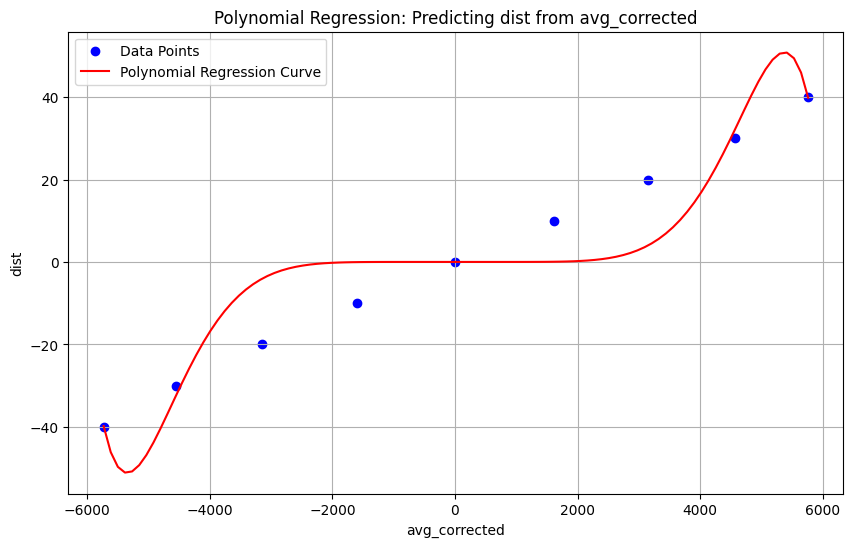

Polynomial Regression Equation: dist = 0.02 + -0.00 * avg_corrected^1 + 0.00 * avg_corrected^2 + 0.00 * avg_corrected^3 + -0.00 * avg_corrected^4 + 0.00 * avg_corrected^5 + -0.00 * avg_corrected^6 + 0.00 * avg_corrected^7 + -0.00 * avg_corrected^8 + -0.00 * avg_corrected^9 + 0.00 * avg_corrected^10


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# List of specific CSV files
csv_files = [
    'Data_0.csv', 'Data_+10.csv', 'Data_+20.csv', 'Data_+30.csv', 'Data_+40.csv',
    'Data_-10.csv', 'Data_-20.csv', 'Data_-30.csv', 'Data_-40.csv'
]

# Initialize arrays to store data for polynomial regression
independent_feature = []
dependent_feature = []

# Load data and populate arrays
for file in csv_files:
    dist = int(file.split('_')[1].split('.')[0].replace('+',''))  # Extract the 'dist' value from the file name
    data = pd.read_csv(file)

    if 'corrected' not in data.columns:
        print(f"Column 'corrected' does not exist in {file}. Skipping this file.")
        continue
    
    avg_corrected = data['corrected'].mean()
    
    independent_feature.append(avg_corrected)
    dependent_feature.append(dist)

# Reshape the data arrays
independent_feature = np.array(independent_feature).reshape(-1, 1)
dependent_feature = np.array(dependent_feature)

# Perform polynomial regression up to degree 10
degree = 10
poly_features = PolynomialFeatures(degree=degree)
independent_feature_poly = poly_features.fit_transform(independent_feature)

model = LinearRegression()
model.fit(independent_feature_poly, dependent_feature)

# Generate points for the polynomial regression curve
x_range = np.linspace(independent_feature.min(), independent_feature.max(), 100)
x_range_poly = poly_features.transform(x_range.reshape(-1, 1))
predicted_y = model.predict(x_range_poly)

# Plot the data points and polynomial regression curve
plt.figure(figsize=(10, 6))
plt.scatter(independent_feature, dependent_feature, color='blue', label='Data Points')
plt.plot(x_range, predicted_y, color='red', label='Polynomial Regression Curve')
plt.title('Polynomial Regression: Predicting dist from avg_corrected')
plt.xlabel('avg_corrected')
plt.ylabel('dist')
plt.legend()
plt.grid(True)
plt.show()

# Create the equation string
equation = f'dist = {model.intercept_:.2f}'
for i in range(1, degree+1):
    equation += f' + {model.coef_[i]:.2f} * avg_corrected^{i}'
print('Polynomial Regression Equation:', equation)


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import glob

# Load the trained polynomial regression model (replace with your trained model)
# model = load_model('path_to_your_trained_model')

# Test file names
test_files = ['Data_+45.csv', 'Data_-45.csv']

# Initialize arrays to store data for prediction
avg_fDelT_test = []

# Load data and populate arrays
for file in test_files:
    data = pd.read_csv(file)
    avg_fDelT = data['corrected'].mean()
    
    avg_fDelT_test.append(avg_fDelT)

# Reshape the data array
avg_fDelT_test = np.array(avg_fDelT_test).reshape(-1, 1)

# Perform polynomial transformation for the test data
degree = 10  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
avg_fDelT_test_poly = poly_features.fit_transform(avg_fDelT_test)

# Predict dist using the trained polynomial regression model
predicted_dist = model.predict(avg_fDelT_test_poly)

# Print the predicted dist values for each test file
for i, file in enumerate(test_files):
    dist_suffix = file.split('_')[-1].split('.')[0]
    print(f"Test File: {file}, Predicted dist for '{dist_suffix}': {predicted_dist[i]:.2f}")


Test File: Data_+45.csv, Predicted dist for '+45': -12.55
Test File: Data_-45.csv, Predicted dist for '-45': 10.91
